# Functions

In [1]:
from methods.monte_carlo.simulations import DirectSampling
from methods.monte_carlo.systems import HardDiskSystem
import numpy as np
import matplotlib.pyplot as plt

# Main

## Particle density

In [ ]:
def particle_density(sim:DirectSampling, strip_count = 10):
    strip_size = sim.sys.box_size / strip_count
    strips = np.arange(strip_count) * strip_size
    strip_contribution = []
    for strip in strips:
        is_inside = (sim.sys.positions[:,1] >= strip) * (sim.sys.positions[:,1] < strip + strip_size)
        factor = np.sum(is_inside)
        strip_contribution.append(factor)
    sim.strip_density += strip_contribution
# box_size=10

n_particles=10
particle_radius=1
overall_density = 0.1

sqr_r = (n_particles * np.pi * particle_radius**2) / overall_density
box_size=np.sqrt(sqr_r)
sys = HardDiskSystem(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles)
sim = DirectSampling(sys)

strip_count=500
n_steps=int(1e3)
strip_size = box_size /strip_count

sim.strip_density = np.arange(strip_count) * 0.
sim.run(
    # sim.direct_sampling,
    eval_fn=lambda x: particle_density(x,strip_count),
    n_steps=n_steps
)
sim.strip_density /= (n_steps*strip_size)

2025-07-14 20:48:34,163 - INFO - creting system with 10 particles of radii 1 and box size 17.724538509055158
2025-07-14 20:48:34,165 - INFO - density: 0.10000000000000002
2025-07-14 20:48:34,167 - INFO - system created


TypeError: BaseSimulation.run() got an unexpected keyword argument 'eval_function'

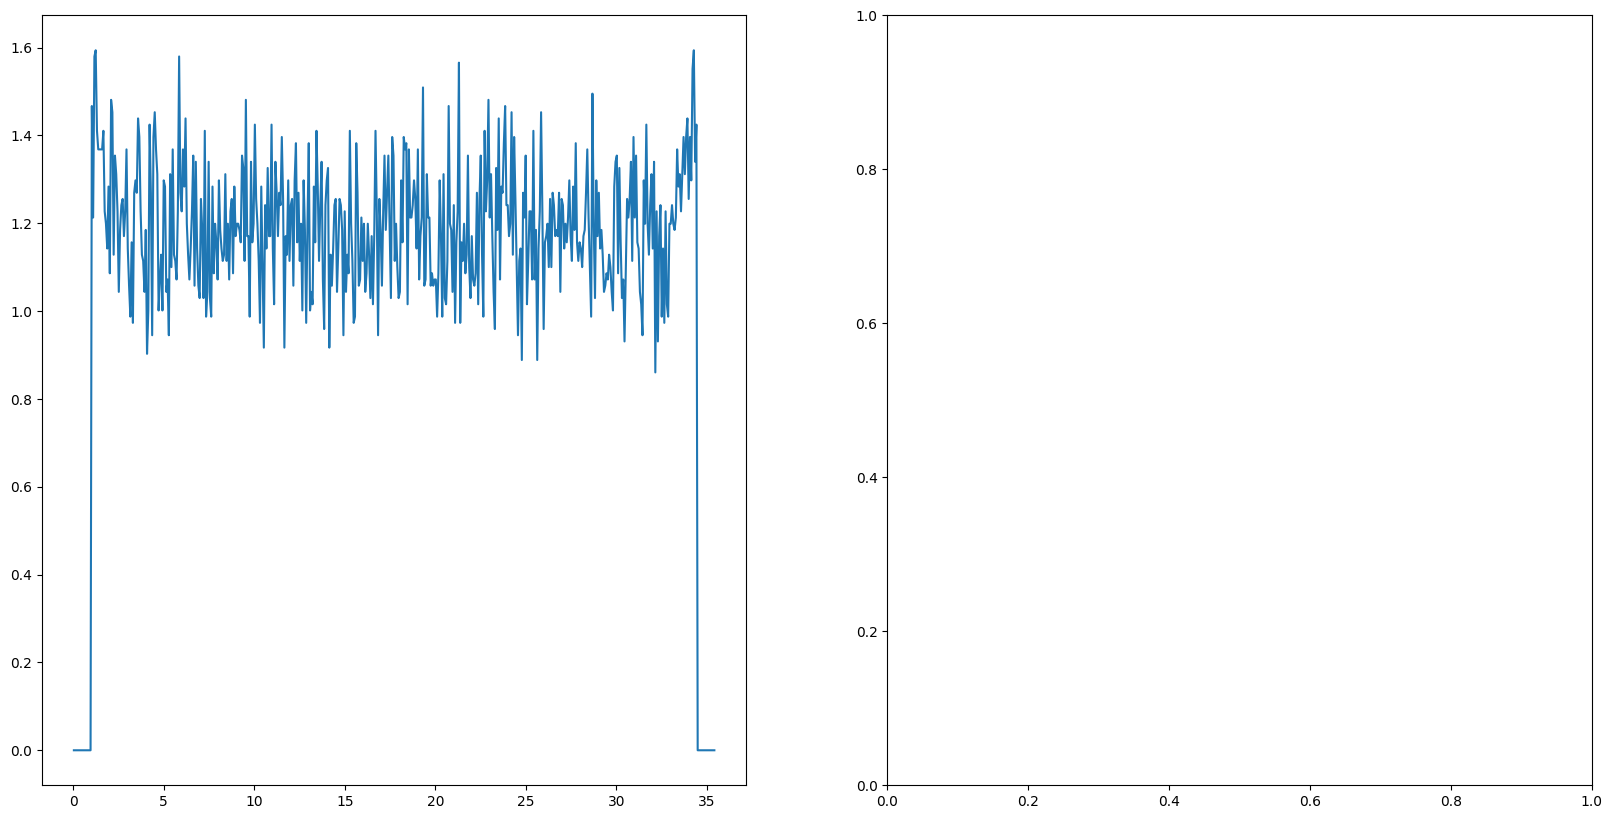

In [ ]:
strip_centers = (np.arange(strip_count) * strip_size) + (strip_size / 2)
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(strip_centers, sim.strip_density, linestyle='-')
# axes[1].plot(strip_centers, sim_big_system.strip_density, linestyle='-')

In [ ]:
sim.strip_density

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.46689292,
       1.2130076 , 1.57973083, 1.59383557, 1.41047396, 1.36815974,
       1.36815974, 1.36815974, 1.36815974, 1.41047396, 1.22711234,
       1.19890287, 1.14248391, 1.2835313 , 1.08606495, 1.48099766,
       1.45278818, 1.12837917, 1.354055  , 1.31174078, 1.22711234,
       1.04375073, 1.18479813, 1.24121708, 1.25532182, 1.17069339,
       1.22711234, 1.36815974, 1.14248391, 1.05785547, 0.98733177,
       1.15658865, 0.97322703, 1.26942656, 1.29763604, 1.26942656,
       1.43868344, 1.39636922, 1.22711234, 1.12837917, 1.11427443,
       1.04375073, 1.18479813, 0.90270333, 1.00143651, 1.4245787 ,
       1.26942656, 0.94501755, 1.39636922, 1.45278818, 1.36815974,
       1.31174078, 1.00143651, 1.07196021, 1.12837917, 1.00143651,
       1.29763604, 1.2835313 , 1.04375073, 1.07196021, 0.94501